In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import ensemble
from sklearn.model_selection import train_test_split 
from sklearn.datasets import make_regression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor


from sklearn import neighbors
from mpl_toolkits import mplot3d
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [3]:
Data = pd.read_csv('C:\\Users\\lenovo\\Documents\\ficek2.csv')


C:\Users\lenovo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#original data 
Data.head(5)


,YYYYMMDD,Value,Time,Intervals,MCC,MNC,LAC,CID,Timezone,Latitude,Longitude,Time1,Interval,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,20100916,123351,12:33:51,15,230,3,1,1,2,50.102976,14.399171,0:00:00,1.0,NaN,NaN,NaN,NaN
1,20100916,123616,12:36:16,15,230,3,1,2,2,50.105526,14.393218,6:00:00,2.0,NaN,NaN,NaN,NaN
2,20100916,123657,12:36:57,15,230,3,1,1,2,50.102976,14.399171,6:30:00,3.0,NaN,NaN,NaN,NaN
3,20100916,123814,12:38:14,15,230,3,1,2,2,50.105526,14.393218,7:00:00,4.0,NaN,NaN,NaN,NaN
4,20100916,123834,12:38:34,15,230,3,1,1,2,50.102976,14.399171,7:30:00,5.0,NaN,NaN,NaN,NaN


In [5]:
del Data["YYYYMMDD"]
Data.head(5)

,Value,Time,Intervals,MCC,MNC,LAC,CID,Timezone,Latitude,Longitude,Time1,Interval,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,123351,12:33:51,15,230,3,1,1,2,50.102976,14.399171,0:00:00,1.0,NaN,NaN,NaN,NaN
1,123616,12:36:16,15,230,3,1,2,2,50.105526,14.393218,6:00:00,2.0,NaN,NaN,NaN,NaN
2,123657,12:36:57,15,230,3,1,1,2,50.102976,14.399171,6:30:00,3.0,NaN,NaN,NaN,NaN
3,123814,12:38:14,15,230,3,1,2,2,50.105526,14.393218,7:00:00,4.0,NaN,NaN,NaN,NaN
4,123834,12:38:34,15,230,3,1,1,2,50.102976,14.399171,7:30:00,5.0,NaN,NaN,NaN,NaN


In [6]:
del Data["Value"]
Data.head(5)

,Time,Intervals,MCC,MNC,LAC,CID,Timezone,Latitude,Longitude,Time1,Interval,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,12:33:51,15,230,3,1,1,2,50.102976,14.399171,0:00:00,1.0,NaN,NaN,NaN,NaN
1,12:36:16,15,230,3,1,2,2,50.105526,14.393218,6:00:00,2.0,NaN,NaN,NaN,NaN
2,12:36:57,15,230,3,1,1,2,50.102976,14.399171,6:30:00,3.0,NaN,NaN,NaN,NaN
3,12:38:14,15,230,3,1,2,2,50.105526,14.393218,7:00:00,4.0,NaN,NaN,NaN,NaN
4,12:38:34,15,230,3,1,1,2,50.102976,14.399171,7:30:00,5.0,NaN,NaN,NaN,NaN


In [7]:
del Data["Time1"]
del Data["Interval"]
del Data["Unnamed: 13"]

In [8]:
del Data["Unnamed: 14"]
del Data["Unnamed: 15"]
del Data["Unnamed: 16"]
#final data
Data.head(5)

,Time,Intervals,MCC,MNC,LAC,CID,Timezone,Latitude,Longitude
0,12:33:51,15,230,3,1,1,2,50.102976,14.399171
1,12:36:16,15,230,3,1,2,2,50.105526,14.393218
2,12:36:57,15,230,3,1,1,2,50.102976,14.399171
3,12:38:14,15,230,3,1,2,2,50.105526,14.393218
4,12:38:34,15,230,3,1,1,2,50.102976,14.399171


In [9]:
#feature and tarets seperation
X = Data.iloc[:,1:7]
Y = Data.iloc[:,7:9]
print(X)
print(Y)

       Intervals  MCC  MNC  LAC  CID  Timezone
0             15  230    3    1    1         2
1             15  230    3    1    2         2
2             15  230    3    1    1         2
3             15  230    3    1    2         2
4             15  230    3    1    1         2
5             15  230    3    1    2         2
6             15  230    3    1    1         2
7             15  230    3    1    2         2
8             15  230    3    1    1         2
9             15  230    3    1    2         2
10            15  230    3    1    1         2
11            15  230    3    1    2         2
12            16  230    3    1    1         2
13            16  230    3    1    2         2
14            16  230    3    1    1         2
15            16  230    3    1    2         2
16            16  230    3    1    1         2
17            16  230    3    1    2         2
18            16  230    3    1    1         2
19            17  230    3    1    2         2
20           

In [227]:
#correlations between all attributes
corr_matrix = Data.corr()
print(corr_matrix)

           Intervals       MCC       MNC       LAC       CID  Timezone  \
Intervals   1.000000 -0.004047  0.010374  0.014958  0.087320 -0.046071   
MCC        -0.004047  1.000000  0.479377  0.437925  0.332868 -0.349861   
MNC         0.010374  0.479377  1.000000  0.694652  0.417368 -0.917345   
LAC         0.014958  0.437925  0.694652  1.000000  0.588057 -0.620980   
CID         0.087320  0.332868  0.417368  0.588057  1.000000 -0.389432   
Timezone   -0.046071 -0.349861 -0.917345 -0.620980 -0.389432  1.000000   
Latitude   -0.018932  0.780279 -0.128787 -0.046703  0.063907  0.250148   
Longitude  -0.027503 -0.325348 -0.936223 -0.662714 -0.382374  0.949950   

           Latitude  Longitude  
Intervals -0.018932  -0.027503  
MCC        0.780279  -0.325348  
MNC       -0.128787  -0.936223  
LAC       -0.046703  -0.662714  
CID        0.063907  -0.382374  
Timezone   0.250148   0.949950  
Latitude   1.000000   0.296734  
Longitude  0.296734   1.000000  


In [229]:
#marking all features having realtionship more than 25% with target 1
features_rel = corr_matrix['Latitude']
#print(features_rel)
cor_features = features_rel[abs(features_rel) > 0.25]
print(cor_features)

MCC          0.780279
Timezone     0.250148
Latitude     1.000000
Longitude    0.296734
Name: Latitude, dtype: float64


In [230]:
#marking all features having realtionship more than 25% with target 2
features_rel = corr_matrix['Longitude']
#print(features_rel)
cor_features = features_rel[abs(features_rel) > 0.25]
print(cor_features)

MCC         -0.325348
MNC         -0.936223
LAC         -0.662714
CID         -0.382374
Timezone     0.949950
Latitude     0.296734
Longitude    1.000000
Name: Longitude, dtype: float64


In [44]:
# considering only first 10000 rows for feature target relationship analysis(dataset is subset of Data)
dataset=Data.iloc[:10000,]
print (dataset)

          Time  Intervals  MCC  MNC  LAC  CID  Timezone   Latitude  Longitude
0     12:33:51         15  230    3    1    1         2  50.102976  14.399171
1     12:36:16         15  230    3    1    2         2  50.105526  14.393218
2     12:36:57         15  230    3    1    1         2  50.102976  14.399171
3     12:38:14         15  230    3    1    2         2  50.105526  14.393218
4     12:38:34         15  230    3    1    1         2  50.102976  14.399171
5     12:39:10         15  230    3    1    2         2  50.105526  14.393218
6     12:41:01         15  230    3    1    1         2  50.102976  14.399171
7     12:42:44         15  230    3    1    2         2  50.105526  14.393218
8     12:53:21         15  230    3    1    1         2  50.102976  14.399171
9     12:58:12         15  230    3    1    2         2  50.105526  14.393218
10    12:59:37         15  230    3    1    1         2  50.102976  14.399171
11    12:59:51         15  230    3    1    2         2  50.1055

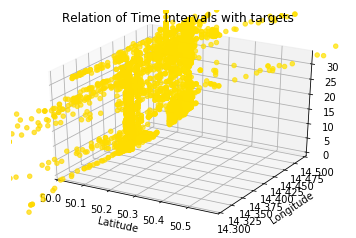

In [45]:
#plotting the relationships between each feature and targets
fig = plt.figure()
ax = plt.axes(projection='3d')
zdata=dataset['Intervals'].values
xdata=dataset['Latitude'].values
ydata=dataset['Longitude'].values
ax.scatter3D(xdata, ydata, zdata, c=ydata, cmap='autumn');
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("Relation of Time Intervals with targets")
plt.xlim([50, 50.6])
plt.ylim([14.30, 14.5])
plt.show()

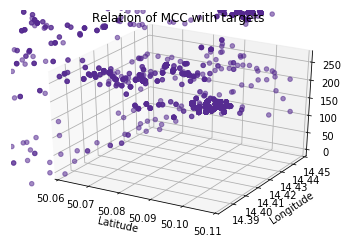

In [46]:
fig = plt.figure()
ax = plt.axes(projection='3d')
zdata=dataset['MCC'].values
xdata=dataset['Latitude'].values
ydata=dataset['Longitude'].values
ax.scatter3D(xdata, ydata, zdata, c=ydata, cmap='Purples');
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("Relation of MCC with targets")
plt.xlim([50.06, 50.11])
plt.ylim([14.38, 14.45])
plt.show()

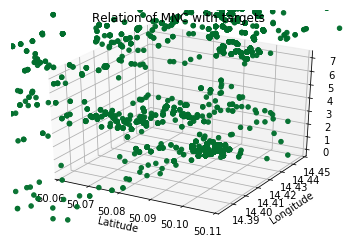

In [47]:
fig = plt.figure()
ax = plt.axes(projection='3d')
zdata=dataset['MNC'].values
xdata=dataset['Latitude'].values
ydata=dataset['Longitude'].values
ax.scatter3D(xdata, ydata, zdata, c=ydata, cmap='Greens');
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("Relation of MNC with targets")
plt.xlim([50.06, 50.11])
plt.ylim([14.38, 14.45])
plt.show()

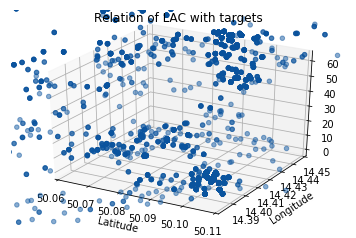

In [48]:
fig = plt.figure()
ax = plt.axes(projection='3d')
zdata=dataset['LAC'].values
xdata=dataset['Latitude'].values
ydata=dataset['Longitude'].values
ax.scatter3D(xdata, ydata, zdata, c=ydata, cmap='Blues');
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("Relation of LAC with targets")
plt.xlim([50.06, 50.11])
plt.ylim([14.38, 14.45])
plt.show()

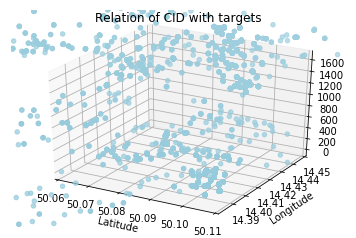

In [49]:
fig = plt.figure()
ax = plt.axes(projection='3d')
zdata=dataset['CID'].values
xdata=dataset['Latitude'].values
ydata=dataset['Longitude'].values
ax.scatter3D(xdata, ydata, zdata, c=ydata, cmap='ocean');
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("Relation of CID with targets")
plt.xlim([50.06, 50.11])
plt.ylim([14.38, 14.45])
plt.show()

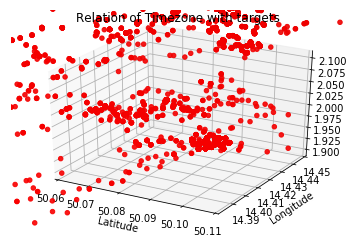

In [50]:
fig = plt.figure()
ax = plt.axes(projection='3d')
zdata=dataset['Timezone'].values
xdata=dataset['Latitude'].values
ydata=dataset['Longitude'].values
ax.scatter3D(xdata, ydata, zdata, c=ydata, cmap='nipy_spectral');
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("Relation of Timezone with targets")
plt.xlim([50.06, 50.11])
plt.ylim([14.38, 14.45])
plt.show()

In [80]:
#splitting data into training and testing set(ratio=3:1)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)


In [163]:
#gradient boosting regressor
gbr = MultiOutputRegressor(GradientBoostingRegressor(n_estimators=50,max_depth=6,random_state=1)).fit(x_train, y_train)
gbr

MultiOutputRegressor(estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=6, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=50, presort='auto', random_state=1,
             subsample=1.0, verbose=0, warm_start=False),
           n_jobs=1)

In [164]:
y_pred = gbr.predict(x_test)
print(y_pred)

[[ 49.47814795   7.63114835]
 [ 40.73646973 -73.56064882]
 [ 50.58201206  14.92808554]
 ...
 [ 49.94663858  14.45504856]
 [ 50.58201206  14.92808554]
 [ 49.50070926   6.90113082]]


In [165]:
gbr.score(x_test,y_test)

0.9990958029764435

In [166]:
gbrmse = mean_squared_error(y_test, y_pred)
print("MSE: %.4f" % gbrmse)

MSE: 0.1307


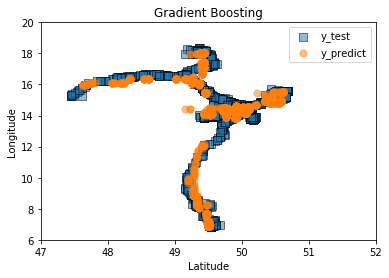

In [167]:
s = 50
a = 0.5
plt.scatter(y_test.iloc[:,0],y_test.iloc[:,1],marker='s',edgecolor='k',s = s,alpha = a,label="y_test")
plt.scatter(y_pred[:,0],y_pred[:,1],s = s,alpha = a,label="y_predict")
plt.xlim([47, 52])
plt.ylim([6, 20])
plt.legend(loc='upper right')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("Gradient Boosting")
plt.show()

In [168]:
#randoom forest regressor
rlf = MultiOutputRegressor(RandomForestRegressor(n_estimators=50,max_depth=6,random_state=1))
rlf
rlf.fit(x_train,y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False),
           n_jobs=1)

In [169]:
y_pred = rlf.predict(x_test)
print(y_pred)


[[ 49.40198575   7.95740662]
 [ 40.73441191 -73.9887315 ]
 [ 50.39617016  14.49509374]
 ...
 [ 50.04232806  14.49509374]
 [ 50.39617016  14.49509374]
 [ 49.39074414   6.97958141]]


In [170]:
rlf.score(x_test,y_test)

0.9977467945818967

In [172]:
rdmse = mean_squared_error(y_test, y_pred)
print("MSE: %.4f" % rdmse)

MSE: 0.4864


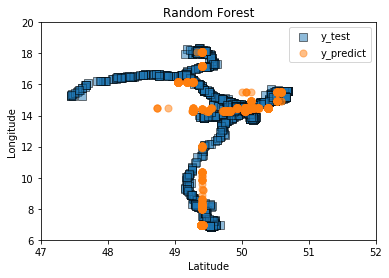

In [173]:
s = 50
a = 0.5
plt.scatter(y_test.iloc[:,0],y_test.iloc[:,1],marker='s',edgecolor='k',s = s,alpha = a,label="y_test")
plt.scatter(y_pred[:,0],y_pred[:,1],s = s,alpha = a,label="y_predict")
plt.xlim([47, 52])
plt.ylim([6, 20])
plt.legend(loc='upper right')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("Random Forest")
plt.show()

In [174]:
#decision tree regressor
dtr = MultiOutputRegressor(DecisionTreeRegressor(max_depth=6))
dtr.fit(x_train,y_train)

MultiOutputRegressor(estimator=DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
           n_jobs=1)

In [175]:
y_pred=dtr.predict(x_test)
print(y_pred)

[[ 49.34365501   8.19012509]
 [ 40.73048912 -73.99403854]
 [ 50.22200357  14.49494997]
 ...
 [ 50.03768196  14.49494997]
 [ 50.22200357  14.49494997]
 [ 49.34365501   6.94401685]]


In [176]:
dtr.score(x_test,y_test)

0.9975982001403944

In [177]:
dtrmse = mean_squared_error(y_test, y_pred)
print("MSE: %.4f" % dtrmse)

MSE: 0.4634


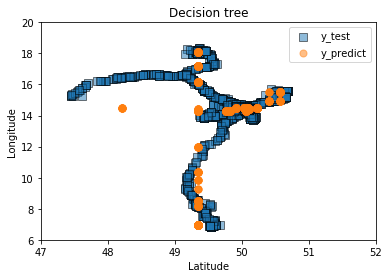

In [178]:
plt.scatter(y_test.iloc[:,0],y_test.iloc[:,1],marker='s',edgecolor='k',s = s,alpha = a,label="y_test")
plt.scatter(y_pred[:,0],y_pred[:,1],s = s,alpha = a,label="y_predict")
plt.xlim([47, 52])
plt.ylim([6, 20])
plt.legend(loc='upper right')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("Decision tree")
plt.show()

In [179]:
#adaboost regressor
ad = MultiOutputRegressor(AdaBoostRegressor(DecisionTreeRegressor(max_depth=6),
                          n_estimators=50, random_state=1))

ad.fit(x_train, y_train)


MultiOutputRegressor(estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=50, random_state=1),
           n_jobs=1)

In [180]:
y_pred = ad.predict(x_test)
print(y_pred)

[[ 49.48724523   7.96636506]
 [ 40.72805921 -73.98086918]
 [ 50.15468425  14.48468432]
 ...
 [ 50.0465269   14.49645835]
 [ 50.15468425  14.48252319]
 [ 49.45208113   7.10471873]]


In [181]:
ad.score(x_test,y_test)

0.9991052368271116

In [182]:
admse = mean_squared_error(y_test, y_pred)
print("MSE: %.4f" % admse)

MSE: 0.1433


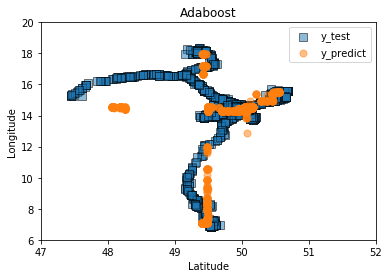

In [206]:
#sns.reset_orig()
plt.scatter(y_test.iloc[:,0],y_test.iloc[:,1],marker='s',edgecolor='k',s = s,alpha = a,label="y_test")
plt.scatter(y_pred[:,0],y_pred[:,1],s = s,alpha = a,label="y_predict")
plt.xlim([47, 52])
plt.ylim([6, 20])
plt.legend(loc='upper right')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("Adaboost")
plt.show()

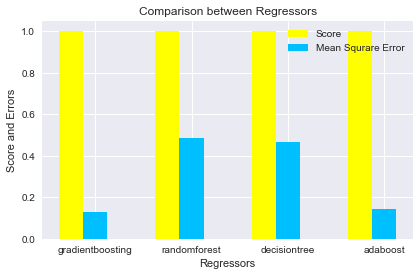

In [208]:
#plotting the comparison between regressors
import seaborn as sns

sns.set()
n_groups=4
score=(0.9990,.9977,0.9975,0.9991)
mse=(0.1307,0.4864,0.4634,0.1433)

fig, ax=plt.subplots()
index=np.arange(n_groups)
bar_width=0.25
opacity=1.0

rects1=plt.bar(index,score,bar_width,
alpha=opacity,
color='yellow',
label='Score')

rects1=plt.bar(index + bar_width,mse ,bar_width,
alpha=opacity,
color='deepskyblue',
label='Mean Squrare Error')

plt.xlabel('Regressors')
plt.ylabel('Score and Errors')
plt.title('Comparison between Regressors')
plt.xticks(index + bar_width, ('gradientboosting','randomforest','decisiontree','adaboost'))
plt.legend()

plt.tight_layout()
plt.show()

In [10]:
dataset=Data.iloc[:100,]
M = dataset.iloc[:,1:7]
N = dataset.iloc[:,7:9]
print(M)
print(N)

    Intervals  MCC  MNC  LAC  CID  Timezone
0          15  230    3    1    1         2
1          15  230    3    1    2         2
2          15  230    3    1    1         2
3          15  230    3    1    2         2
4          15  230    3    1    1         2
5          15  230    3    1    2         2
6          15  230    3    1    1         2
7          15  230    3    1    2         2
8          15  230    3    1    1         2
9          15  230    3    1    2         2
10         15  230    3    1    1         2
11         15  230    3    1    2         2
12         16  230    3    1    1         2
13         16  230    3    1    2         2
14         16  230    3    1    1         2
15         16  230    3    1    2         2
16         16  230    3    1    1         2
17         16  230    3    1    2         2
18         16  230    3    1    1         2
19         17  230    3    1    2         2
20         17  230    3    1    1         2
21         17  230    3    1    

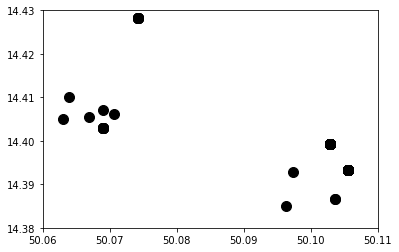

In [11]:
f1=dataset['Latitude'].values
f2=dataset['Longitude'].values
m=np.array(list(zip(f1,f2)))
plt.scatter(f1,f2,c='black',s=100)
plt.xlim([50.06, 50.11])
plt.ylim([14.38, 14.43])
plt.show()

In [40]:
from sklearn.cluster import KMeans
import numpy as np

In [41]:
#Y_new = Data.iloc[0:100,6:]
def doKmeans(X, nclust=10):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(N, 5)
print(len(clust_labels))
kmeans = pd.DataFrame(clust_labels)

100


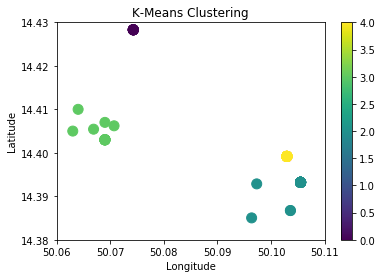

In [42]:
import pandas as pd
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(N['Latitude'],N['Longitude'], c = kmeans[0],s=100)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_xlim([50.06, 50.11])
ax.set_ylim([14.38, 14.43])
plt.colorbar(scatter)

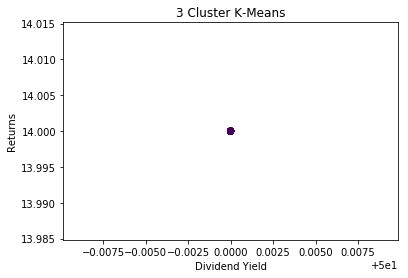

In [51]:
kmeans=KMeans(n_clusters=5,n_init=10, tol=0.000001)

kmeansoutput=kmeans.fit(df)

#kmeansoutput
import pylab as pl


pl.figure('5 Cluster K-Means')

plt.scatter(df.iloc[:,0], df.iloc[:, 1], c=kmeansoutput.labels_)
pl.xlabel('Dividend Yield')

pl.ylabel('Returns')

pl.title('3 Cluster K-Means')

pl.show()

In [18]:
columns = ['Latitude', 'Longitude']
df = N.replace(0, pd.np.nan).dropna(axis=0, how='any', subset=columns).fillna(0).astype(int)

In [19]:
kmeansoutput.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])